In [20]:
import warnings
import FinanceDataReader as fdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime
import math
warnings.filterwarnings('ignore')

# Load Dataset

In [32]:
data = fdr.DataReader('005930','2017-10-18', '')
data

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2017-10-18,54820,55240,54039,54760,202215,-0.000730
2017-10-19,54699,54699,52980,52980,242174,-0.032505
2017-10-20,52800,54100,52800,53840,160541,0.016233
2017-10-23,54600,54640,54000,54300,166221,0.008544
2017-10-24,54699,54780,54040,54040,116121,-0.004788
...,...,...,...,...,...,...
2022-10-14,56200,56500,55800,56300,12924326,0.019928
2022-10-17,55800,57000,55700,56600,13641878,0.005329
2022-10-18,56700,57100,55800,56500,14820702,-0.001767


# Compute Mid Price

In [33]:
high_prices = data['High'].values
low_prices = data['Low'].values
close_prices = data['Close'].values
mid_prices = (high_prices + low_prices) / 2

for i in range(len(high_prices)):
    if high_prices[i]==0:
        mid_prices[i] = data['Close'].values[i]

for i in range(len(mid_prices)):
    mid_prices[i]=math.ceil(mid_prices[i])

# Create Windows

In [34]:
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])

# Normalize Data

In [35]:
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)



In [47]:
result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.9)) # 전체 데이터 셋의 90%만 트레이닝
train = result[:row, :]
np.random.shuffle(train) # training data를 shuffle

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1] #
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape


array([[[ 0.        ],
        [-0.00203252],
        [ 0.0101626 ],
        ...,
        [-0.09214092],
        [-0.09891599],
        [-0.100271  ]],

       [[ 0.        ],
        [ 0.01221996],
        [ 0.01900883],
        ...,
        [-0.09708079],
        [-0.09843856],
        [-0.11473184]],

       [[ 0.        ],
        [ 0.00670691],
        [-0.00402414],
        ...,
        [-0.1093226 ],
        [-0.12541918],
        [-0.12810195]],

       ...,

       [[ 0.        ],
        [ 0.00737705],
        [ 0.00491803],
        ...,
        [-0.08032787],
        [-0.08770492],
        [-0.0795082 ]],

       [[ 0.        ],
        [-0.00244101],
        [ 0.00081367],
        ...,
        [-0.09438568],
        [-0.08624898],
        [-0.0829943 ]],

       [[ 0.        ],
        [ 0.00326264],
        [ 0.0040783 ],
        ...,
        [-0.08401305],
        [-0.08075041],
        [-0.07911909]]])

# Build a Model

In [37]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 50, 50)            10400     
                                                                 
 lstm_5 (LSTM)               (None, 64)                29440     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


# Training

In [38]:
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=20)

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
107/107 [==============================] - ETA: 0s - loss: 0.0023WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000017BBECF5A68> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the fu

# Prediction

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


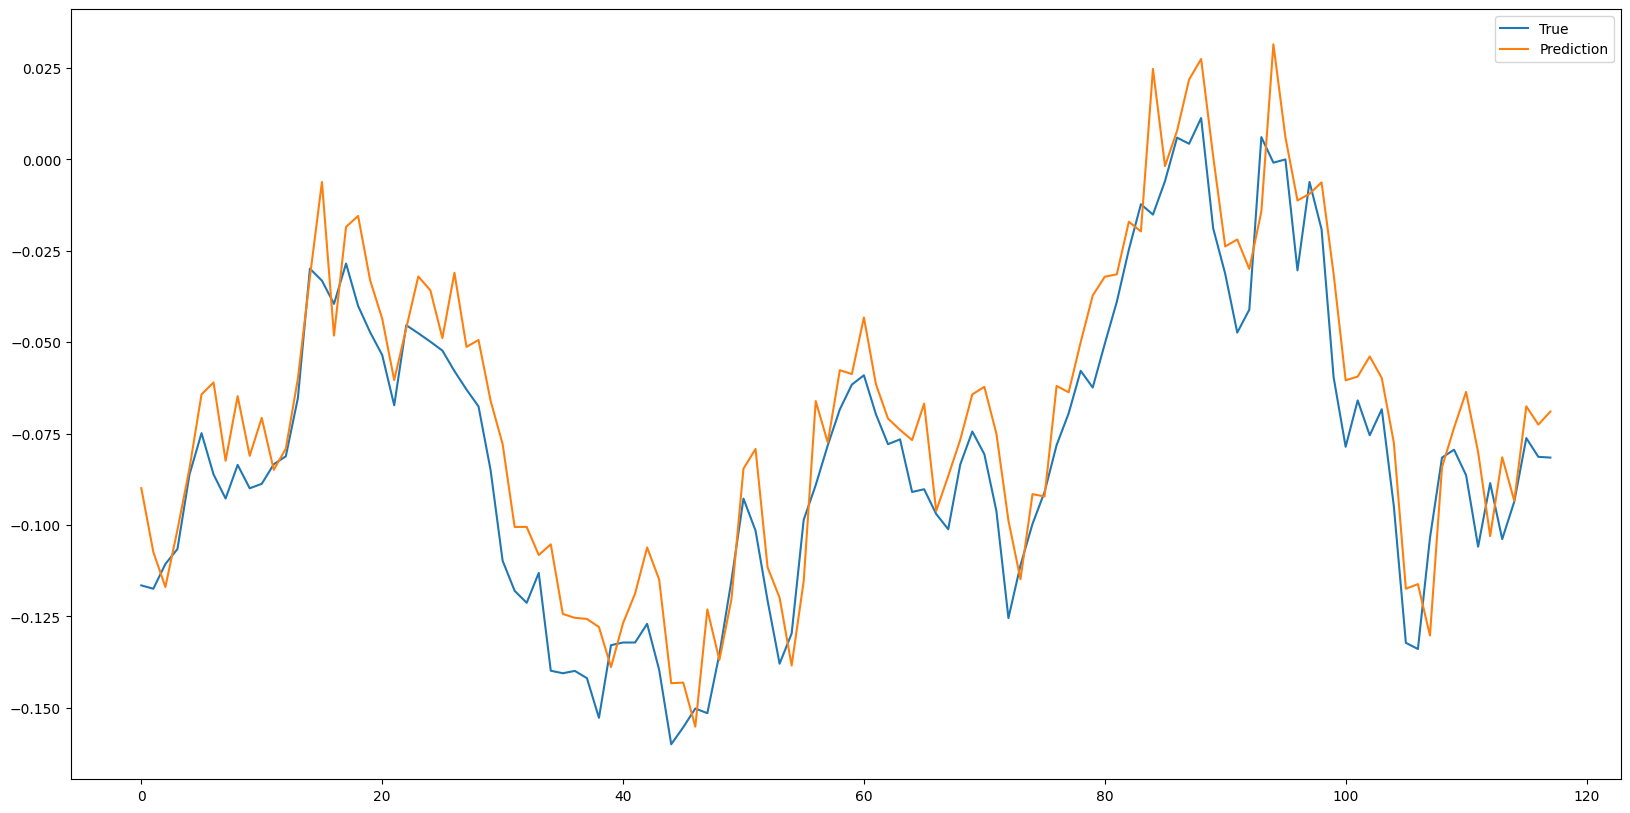

In [39]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()

In [48]:
pred_data=0
for a in range(len(pred)):
    # pred_data+=
    print(y_test[a]-pred[a])



[-0.02659182]
[-0.01002727]
[0.00630937]
[-0.00522406]
[-0.00165508]
[-0.01061151]
[-0.02516963]
[-0.01032927]
[-0.01880623]
[-0.00887401]
[-0.01803332]
[0.00151899]
[-0.00207328]
[-0.00531914]
[0.00229019]
[-0.02700188]
[0.00867036]
[-0.01002317]
[-0.02459905]
[-0.01421628]
[-0.00996943]
[-0.00691315]
[0.0007924]
[-0.01553437]
[-0.01405968]
[-0.00341885]
[-0.02688613]
[-0.01166373]
[-0.01817107]
[-0.01897329]
[-0.03192653]
[-0.0174806]
[-0.02076717]
[-0.00490969]
[-0.03456988]
[-0.01620639]
[-0.0145223]
[-0.01620285]
[-0.02484377]
[0.00599089]
[-0.00528233]
[-0.01338429]
[-0.02089909]
[-0.0247018]
[-0.01671052]
[-0.01221019]
[0.00496154]
[-0.0283662]
[0.00161006]
[0.00512526]
[-0.00818867]
[-0.02232703]
[-0.00910554]
[-0.01804189]
[0.00875595]
[0.01677975]
[-0.02297125]
[-0.00072584]
[-0.01073655]
[-0.00288438]
[-0.01582291]
[-0.00821644]
[-0.00702266]
[-0.00258327]
[-0.01420473]
[-0.02342453]
[-0.00082216]
[-0.01456682]
[-0.00677761]
[-0.01015194]
[-0.0184166]
[-0.02115183]
[-0.02668

## Gragh Stock pattern

In [30]:

# 종가(Close)만 사용할 것이기 때문에 종가만 추출
close = data['Close']

# 주식 가격의 비교 기준 구간 설정
start_data='2017-10-18'
end_data='2022-10-18'

In [31]:
base = close[start_data:end_data]
base_norm = (base - base.min()) / (base.max() - base.min())

In [38]:
# 윈도우 사이즈: 내가 사용하는 pattern의 길이로 사용하는 데이터를 몇일치 볼 것 인지 나타낸다.
window_size = len(base)

# 예측 기간: 예측되는 기간의 길이
next_data = 10

# 검색 횟수: 계속 반복을 진행하며 전체 기록에서 내가 가지고 있는 패턴을 비교
moving_cnt = len(close) - window_size - next_data - 1

In [39]:
def cosine_smilarity(x, y):
    return np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y,y)))

In [40]:
sim_list = []

for i in range(moving_cnt):
    target = close[i:i+window_size]
    
    # Normalize
    target_norm = (target - target.min()) / (target.max() - target.min())
    
    # 코사인 유사도 저장
    cos_similarity = cosine_smilarity(base_norm, target_norm)
    
    # 코사인 유사도 <- i(인덱스), 시계열데이터 함께 저장
    sim_list.append(cos_similarity)

In [41]:
pd.Series(sim_list).sort_values(ascending=False).head(20)

c:\Users\YooByeongJu\.conda\envs\Python3.7\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


Series([], dtype: float64)

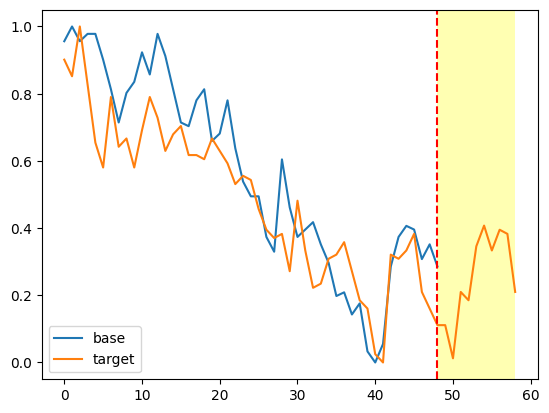

In [28]:
idx= 1074

top_= close[idx:idx+window_size+next_data]
top_norm= (top_ - top_.min()) / (top_.max() - top_.min())

plt.plot(base_norm.values, label='base')
plt.plot(top_norm.values, label='target')
plt.axvline(x=len(base_norm)-1, c='r', linestyle='--')
plt.axvspan(len(base_norm.values)-1, len(top_norm.values)-1, facecolor='yellow', alpha=0.3)
plt.legend()
plt.show()